In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import os
import watershed_udder as wu
from PIL import Image
from skimage import exposure

In [63]:
def mk_dir(dirpath):
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}

plt.rcParams.update(rc)

In [64]:
dirpath = os.getcwd()
label_dir = r"validate_watershed\watershed_segments"
im_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir), r"udder_video\depth_images")
out_dir = r"validate_watershed\watershed_examples"
file_list = os.listdir(label_dir)

KeyboardInterrupt: 

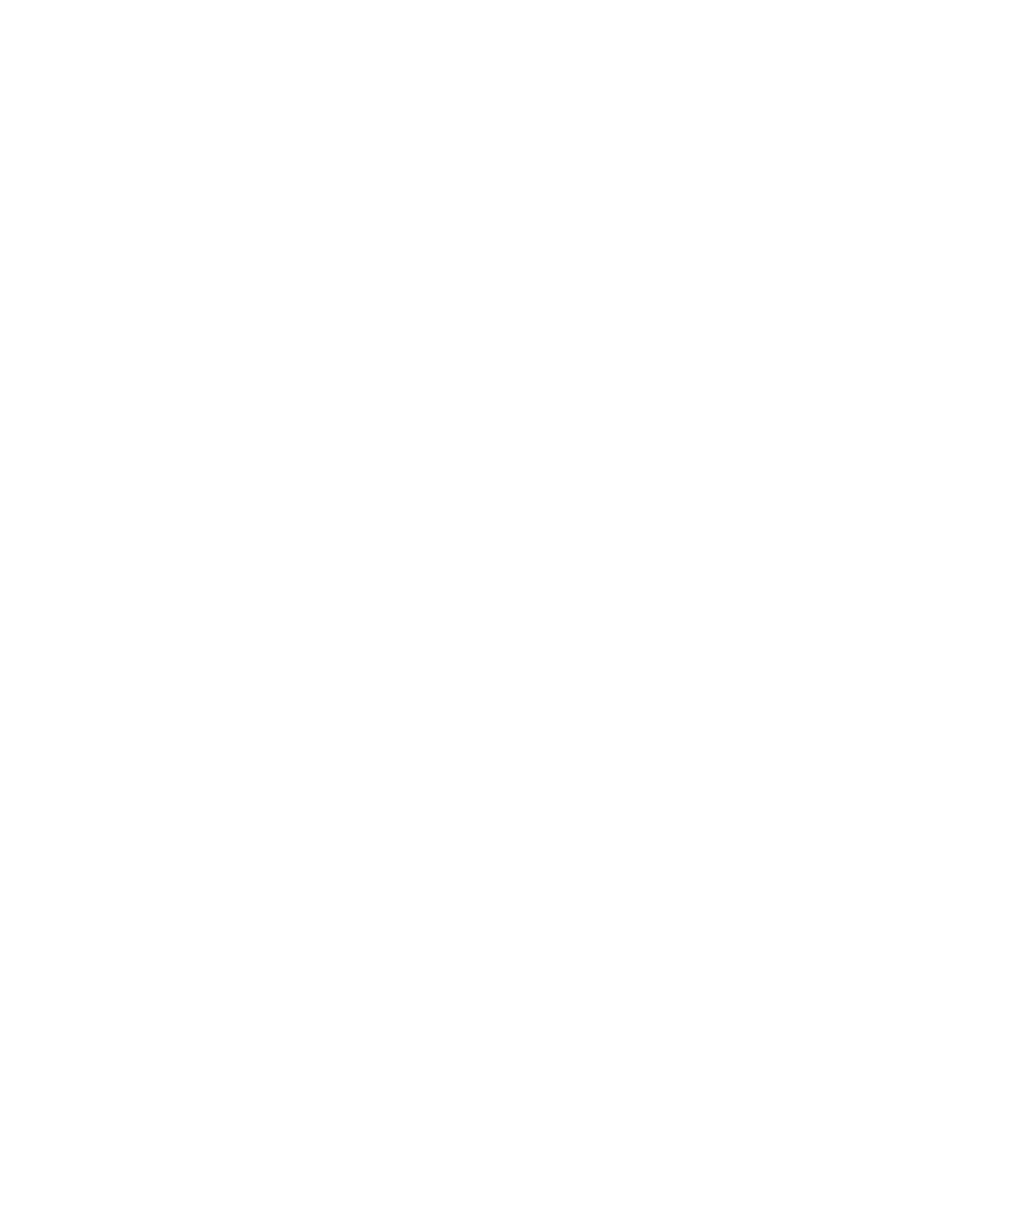

In [66]:
for file in file_list:
    label_file = os.path.join(label_dir, file)
    img_file = file.replace("npy", "tif")
    cow = file.split("_")[0]
    
    img = Image.open(os.path.join(im_dir, cow, img_file))
    labels = np.load(label_file)
    labels_mask =labels.copy().astype("float")
    img2 = exposure.equalize_hist(np.asarray(img), nbins=256, mask=None)
    labels_mask =labels.copy().astype("float")
    labels_mask[labels_mask==0] = np.nan
    fig, (ax1, ax2) = plt.subplots(nrows = 2, constrained_layout=True, figsize=(10, 12), frameon = False)
    ax2.imshow(img2, cmap='gray')
    ax2.imshow(labels_mask, alpha=0.5)
    ax1.imshow(img2, cmap='gray')
    out_path = os.path.join(out_dir,cow)
    mk_dir(out_path)
    fig.savefig(os.path.join(out_path, img_file), transparent = True)
    plt.close(fig)